<a href="https://colab.research.google.com/github/sames12421/Zamato-project/blob/main/zamato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as numpy
import pandas as pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
dataset=pandas.read_csv('/content/Zomato-data-.csv')
dataset.head(50)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [ ]:
print(dataset["listed_in(type)"].unique())

['Buffet' 'Cafes' 'other' 'Dining']


In [ ]:

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['listed_in(type)']=LE.fit_transform(dataset['listed_in(type)'])

In [ ]:
print(dataset['listed_in(type)'])

0      0
1      0
2      0
3      0
4      0
      ..
143    2
144    2
145    2
146    2
147    2
Name: listed_in(type), Length: 148, dtype: int64


In [ ]:
LE=LabelEncoder()
dataset["name"]=LE.fit_transform(dataset["name"])
print(name)

  (0, 117)	1
  (1, 218)	1
  (1, 77)	1
  (2, 207)	1
  (2, 55)	1
  (2, 41)	1
  (3, 2)	1
  (3, 247)	1
  (3, 28)	1
  (4, 98)	1
  (4, 253)	1
  (5, 244)	1
  (5, 71)	1
  (6, 200)	1
  (6, 116)	1
  (6, 109)	1
  (6, 17)	1
  (6, 196)	1
  (7, 175)	1
  (8, 41)	1
  (8, 183)	1
  (9, 215)	1
  (10, 253)	1
  (10, 42)	1
  (11, 41)	1
  :	:
  (137, 109)	1
  (137, 6)	1
  (137, 217)	1
  (138, 196)	1
  (138, 220)	1
  (138, 163)	1
  (138, 81)	1
  (139, 73)	1
  (139, 30)	1
  (139, 9)	1
  (140, 64)	1
  (141, 134)	1
  (141, 229)	1
  (141, 105)	1
  (142, 150)	1
  (142, 95)	1
  (142, 27)	1
  (143, 157)	1
  (143, 156)	1
  (144, 170)	1
  (144, 114)	1
  (145, 7)	1
  (145, 141)	1
  (146, 63)	1
  (147, 252)	1


In [ ]:
dataset['online_order']=LE.fit_transform(dataset['online_order'])
dataset['book_table']=LE.fit_transform(dataset['book_table'])

In [ ]:
x=dataset.drop(['book_table'],axis=1)
y=dataset['book_table']

In [ ]:
# Cell 74 contains the following line and will drop 'listed_in(type)'
dataset.drop('listed_in(type)', axis=1, inplace=True)

KeyError: "['listed_in(type)'] not found in axis"

In [ ]:
print(x)

     name  online_order   rate  votes  approx_cost(for two people)
0      59             1  4.1/5    775                          800
1     113             1  4.1/5    787                          800
2     107             1  3.8/5    918                          800
3       2             0  3.7/5     88                          300
4      52             0  3.8/5    166                          600
..    ...           ...    ...    ...                          ...
143    83             0  3.3/5      0                          100
144    89             0  3.3/5      0                          150
145     4             1  4.0/5    771                          450
146    35             0  3.0/5     98                          800
147   139             1  3.9/5     47                          200

[148 rows x 5 columns]


In [ ]:
print(y)

0      1
1      0
2      0
3      0
4      0
      ..
143    0
144    0
145    0
146    0
147    0
Name: book_table, Length: 148, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((118, 5), (30, 5), (118,), (30,))

In [ ]:
x_train['rate'] = x_train['rate'].str.split('/').str[0].astype(float)
x_test['rate'] = x_test['rate'].str.split('/').str[0].astype(float)

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred)*100)

96.66666666666667


In [ ]:
acc=accuracy_score(y_test,y_pred)

In [ ]:
plot=pandas.DataFrame({'Actual':y_test,'Predicted':y_pred})
plot.head(10)

,Actual,Predicted
115,0,0
48,0,0
3,0,0
42,0,0
125,0,0
24,0,0
108,0,0
12,1,0
126,0,0
139,0,0


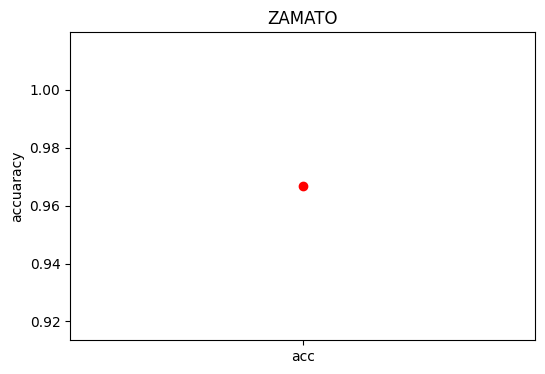

In [ ]:
plt.figure(figsize=(6,4))
# Use plt.bar() to create the bar plot
plt.scatter(['acc'], [acc], color='red')
plt.hist
plt.title('ZAMATO')
plt.ylabel("accuaracy")
plt.show()

(array([ 0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

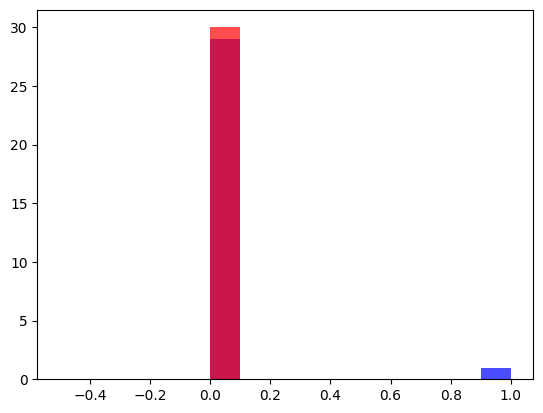

In [ ]:
plt.hist(plot['Actual'], bins=10, color='blue', alpha=0.7, label='Actual')

# Create a histogram for the 'Predicted' column
plt.hist(plot['Predicted'], bins=10, color='red', alpha=0.7, label='Predicted')


In [ ]:
online_order = int(input("Online Order (1 for Yes, 0 for No): "))
approx_cost = int(input("Approx Cost for Two People: "))
rating = float(input("Restaurant Rating: "))
votes = int(input("Number of Votes: "))
name = input("Enter Restaurant Name: ")  # Get restaurant name as input

# Check if the restaurant name is in the LabelEncoder's classes
if name in LE.classes_:
    name_encoded = LE.transform([name])[0]
else:
    # Handle unseen restaurant names (e.g., assign a default value)
    name_encoded = -1  # Or any other appropriate value

input_data = [[name_encoded, online_order, approx_cost, rating, votes]]
input_data = np.array(input_data).reshape(1, -1)
input_data = scaler.transform(input_data)

prediction = model.predict(input_data)
print("Predicted Sentiment:", prediction[0])

Online Order (1 for Yes, 0 for No): 1
Approx Cost for Two People: 800
Restaurant Rating: 3.8
Number of Votes: 918
Enter Restaurant Name: San Churro Cafe
Predicted Sentiment: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
